# 최종 파일
- 최종_오버워치갤반응.csv -> 감성분석이 완료되면 분석 진행
- 최종_접속자수.csv
- 최종_스팀게임정보10차.csv
- 최종_유저데이터4차.csv -> 추천여부 0이 비추천, 1이 비추천
- 최종_게임접속자0제외.csv

# 접속자 증감률EDA

## 접속자 수 최근 1년치만 사용
- 이렇게 했을 때 오버워치 유저수 감소가 극명하게 나타남

- 구하는 공식
- (2507 유저수 - 2407 유저수) / 12 

In [2]:
import pandas as pd
df = pd.read_csv('최종_스팀게임정보0제외.csv')
df1 = pd.read_csv('최종_접속자수.csv')

In [3]:
# Avg 컬럼만 선택 + 2024년 7월(2407) 이후부터 남기기
cols = ['id'] + [col for col in df1.columns if col.endswith('_Avg') and int(col[:4]) >= 2407]
df_filtered = df1[cols]

df_filtered

,id,2407_Avg,2408_Avg,2409_Avg,2410_Avg,2411_Avg,2412_Avg,2501_Avg,2502_Avg,2503_Avg,2504_Avg,2505_Avg,2506_Avg,2507_Avg
0,1384160,2871.5,2439.3,1998.1,2180.8,3299.6,1848.9,1567.2,1523.3,1714.5,1836.7,2281.1,2038.7,1546.2
1,2141910,5098.8,6566.4,6252.3,6115.9,6499.9,5387.2,5368.5,6148.8,5850.9,6627.6,6411.9,8669.7,8644.6
2,1477590,131.4,120.9,103.1,105.9,99.1,89.0,115.2,93.5,95.6,78.2,107.4,90.5,85.3
3,1326470,8765.7,6903.5,5803.1,6820.9,13790.0,16985.8,17323.0,9338.0,11098.6,12970.8,6460.2,7913.1,18785.9
4,550,27361.6,22683.6,19938.9,20789.1,30372.5,27355.1,26582.6,28121.3,24513.3,20885.2,22194.5,26652.2,26208.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,1172650,6.7,5.9,4.6,8.5,4.4,6.9,5.4,3.9,19.3,8.5,6.4,5.4,7.8
5557,718590,3.5,2.6,3.7,3.3,7.5,4.6,5.2,4.0,3.2,3.5,2.6,4.2,3.1
5558,2964020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5559,3266210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_filtered['avg_mean'] = (df_filtered['2507_Avg'] - df_filtered['2407_Avg']) / 12
df_filtered

C:\Users\user\AppData\Local\Temp\ipykernel_28488\831078782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['avg_mean'] = (df_filtered['2507_Avg'] - df_filtered['2407_Avg']) / 12


,id,2407_Avg,2408_Avg,2409_Avg,2410_Avg,2411_Avg,2412_Avg,2501_Avg,2502_Avg,2503_Avg,2504_Avg,2505_Avg,2506_Avg,2507_Avg,avg_mean
0,1384160,2871.5,2439.3,1998.1,2180.8,3299.6,1848.9,1567.2,1523.3,1714.5,1836.7,2281.1,2038.7,1546.2,-110.441667
1,2141910,5098.8,6566.4,6252.3,6115.9,6499.9,5387.2,5368.5,6148.8,5850.9,6627.6,6411.9,8669.7,8644.6,295.483333
2,1477590,131.4,120.9,103.1,105.9,99.1,89.0,115.2,93.5,95.6,78.2,107.4,90.5,85.3,-3.841667
3,1326470,8765.7,6903.5,5803.1,6820.9,13790.0,16985.8,17323.0,9338.0,11098.6,12970.8,6460.2,7913.1,18785.9,835.016667
4,550,27361.6,22683.6,19938.9,20789.1,30372.5,27355.1,26582.6,28121.3,24513.3,20885.2,22194.5,26652.2,26208.5,-96.091667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,1172650,6.7,5.9,4.6,8.5,4.4,6.9,5.4,3.9,19.3,8.5,6.4,5.4,7.8,0.091667
5557,718590,3.5,2.6,3.7,3.3,7.5,4.6,5.2,4.0,3.2,3.5,2.6,4.2,3.1,-0.033333
5558,2964020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5559,3266210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [5]:
# 오버워치 평균 유저 증감수, 증감률
df_filtered[df_filtered['id'] == 2357570]['avg_mean']

4866   -622.291667
Name: avg_mean, dtype: float64

In [6]:
df = df.merge(
    df_filtered[['id', 'avg_mean']],
    how='left',
    left_on='appid',
    right_on='id'
)
df.drop('id', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                3351 non-null   int64  
 1   game_name            3351 non-null   object 
 2   genre                3351 non-null   object 
 3   price                3351 non-null   int64  
 4   release_date         3351 non-null   object 
 5   developer            3351 non-null   object 
 6   publisher            3351 non-null   object 
 7   user_reaction        3351 non-null   object 
 8   DLC여부                3351 non-null   float64
 9   all_reviews          3351 non-null   float64
 10  positive_reviews     3351 non-null   float64
 11  negative_reviews     3351 non-null   float64
 12  sns_channels         3351 non-null   object 
 13  features             3351 non-null   object 
 14  bundle               3351 non-null   float64
 15  awards               3351 non-null   f

## 장르별 접속자수 증감률

In [8]:
# 원본 df 복사
df_copy = df.copy()

# main_genre 기준으로 평균 계산
genre_stats_main = df_copy.groupby('main_genre')[['avg_mean']].mean().reset_index()

genre_stats_main

,main_genre,avg_mean
0,1인칭 슈팅,-20.156763
1,2D,-85.630556
2,2D 격투,-0.851515
3,2D 플랫폼,0.102778
4,3D,1.458333
...,...,...
235,현실적,-32.733333
236,협동,-16.166959
237,협동 캠페인,-0.069444
238,횡스크롤,-0.608333


C:\Users\user\AppData\Local\Temp\ipykernel_28488\43326756.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='main_genre', y='avg_mean', palette='viridis')


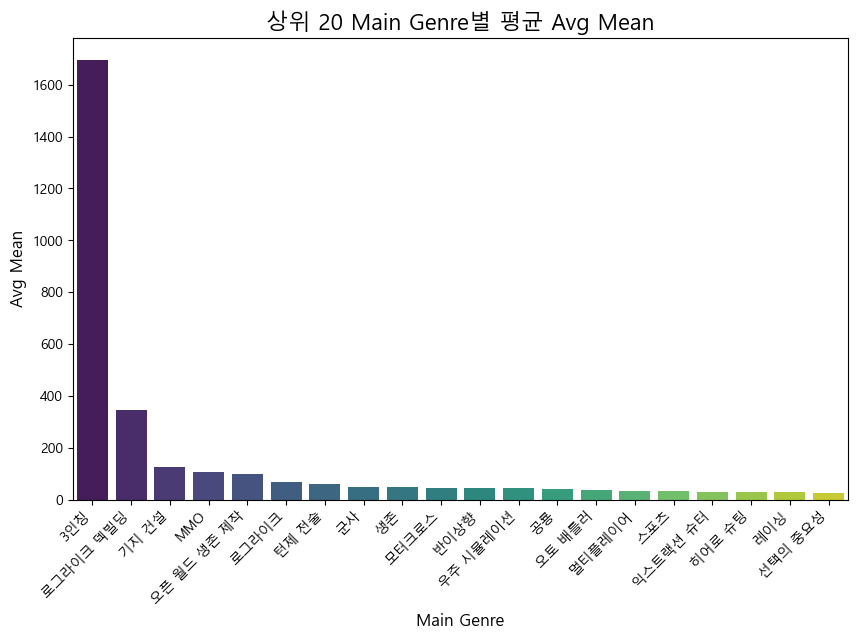

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 상위 5개 장르 선택
top_n = 20
top_genres = genre_stats_main.sort_values(by='avg_mean', ascending=False).head(top_n)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='main_genre', y='avg_mean', palette='viridis')

plt.title(f'상위 {top_n} Main Genre별 평균 Avg Mean', fontsize=16)
plt.xlabel('Main Genre', fontsize=12)
plt.ylabel('Avg Mean', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

- 3인칭 장르가 최근 1년간 가장 많은 평균 접속자수 증가 수치를 보여줌
- 그 뒤로는 로그라이크 덱빌딩, 기지 건설, MMO 장르가 있지만 이 수치들이 급격하게 낮아지고 있음

- 기본 접속자 수가 많은 게임들 중에서 증감수 확인

C:\Users\user\AppData\Local\Temp\ipykernel_28488\2822435925.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_growth, y='main_genre', x='avg_mean', palette='magma')


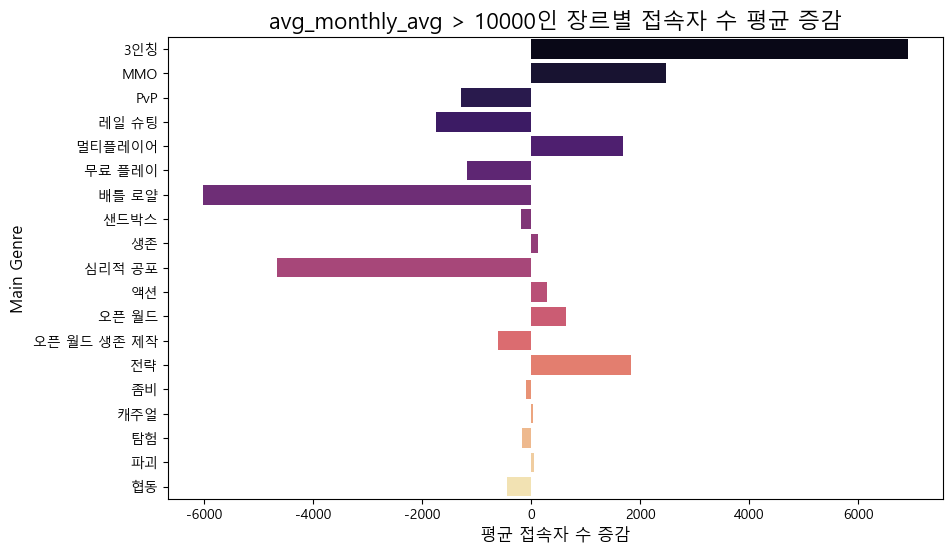

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 조건 필터링
df_filtered = df[df['avg_monthly_avg'] > 10000].sort_values(by='avg_monthly_avg', ascending=False).head(30)

# 2. 장르별 평균 증감 계산
genre_growth = df_filtered.groupby('main_genre')['avg_mean'].mean().reset_index()

# 4. 가로 막대그래프 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=genre_growth, y='main_genre', x='avg_mean', palette='magma')

plt.title('avg_monthly_avg > 10000인 장르별 접속자 수 평균 증감', fontsize=16)
plt.xlabel('평균 접속자 수 증감', fontsize=12)
plt.ylabel('Main Genre', fontsize=12)
plt.show()


- 3인칭, MMO, 멀티플레이어, 생존, 액션, 오픈월드, 전략 장르는 평균 접속자 수가 상승 하고 있는 추세
- pvp, 레일 슈팅, 무료 플레이, 배틀 로얄, 샌드박스, 심리적 공포 장르는 감소 추세
- 이중, 3인칭, MMO, 배틀로얄, 심리적 공포 장르에서 평균 2천명 이상의 유저 수가 증감하고 있음

- 장르별 게임들의 유저 수 증감률 확인

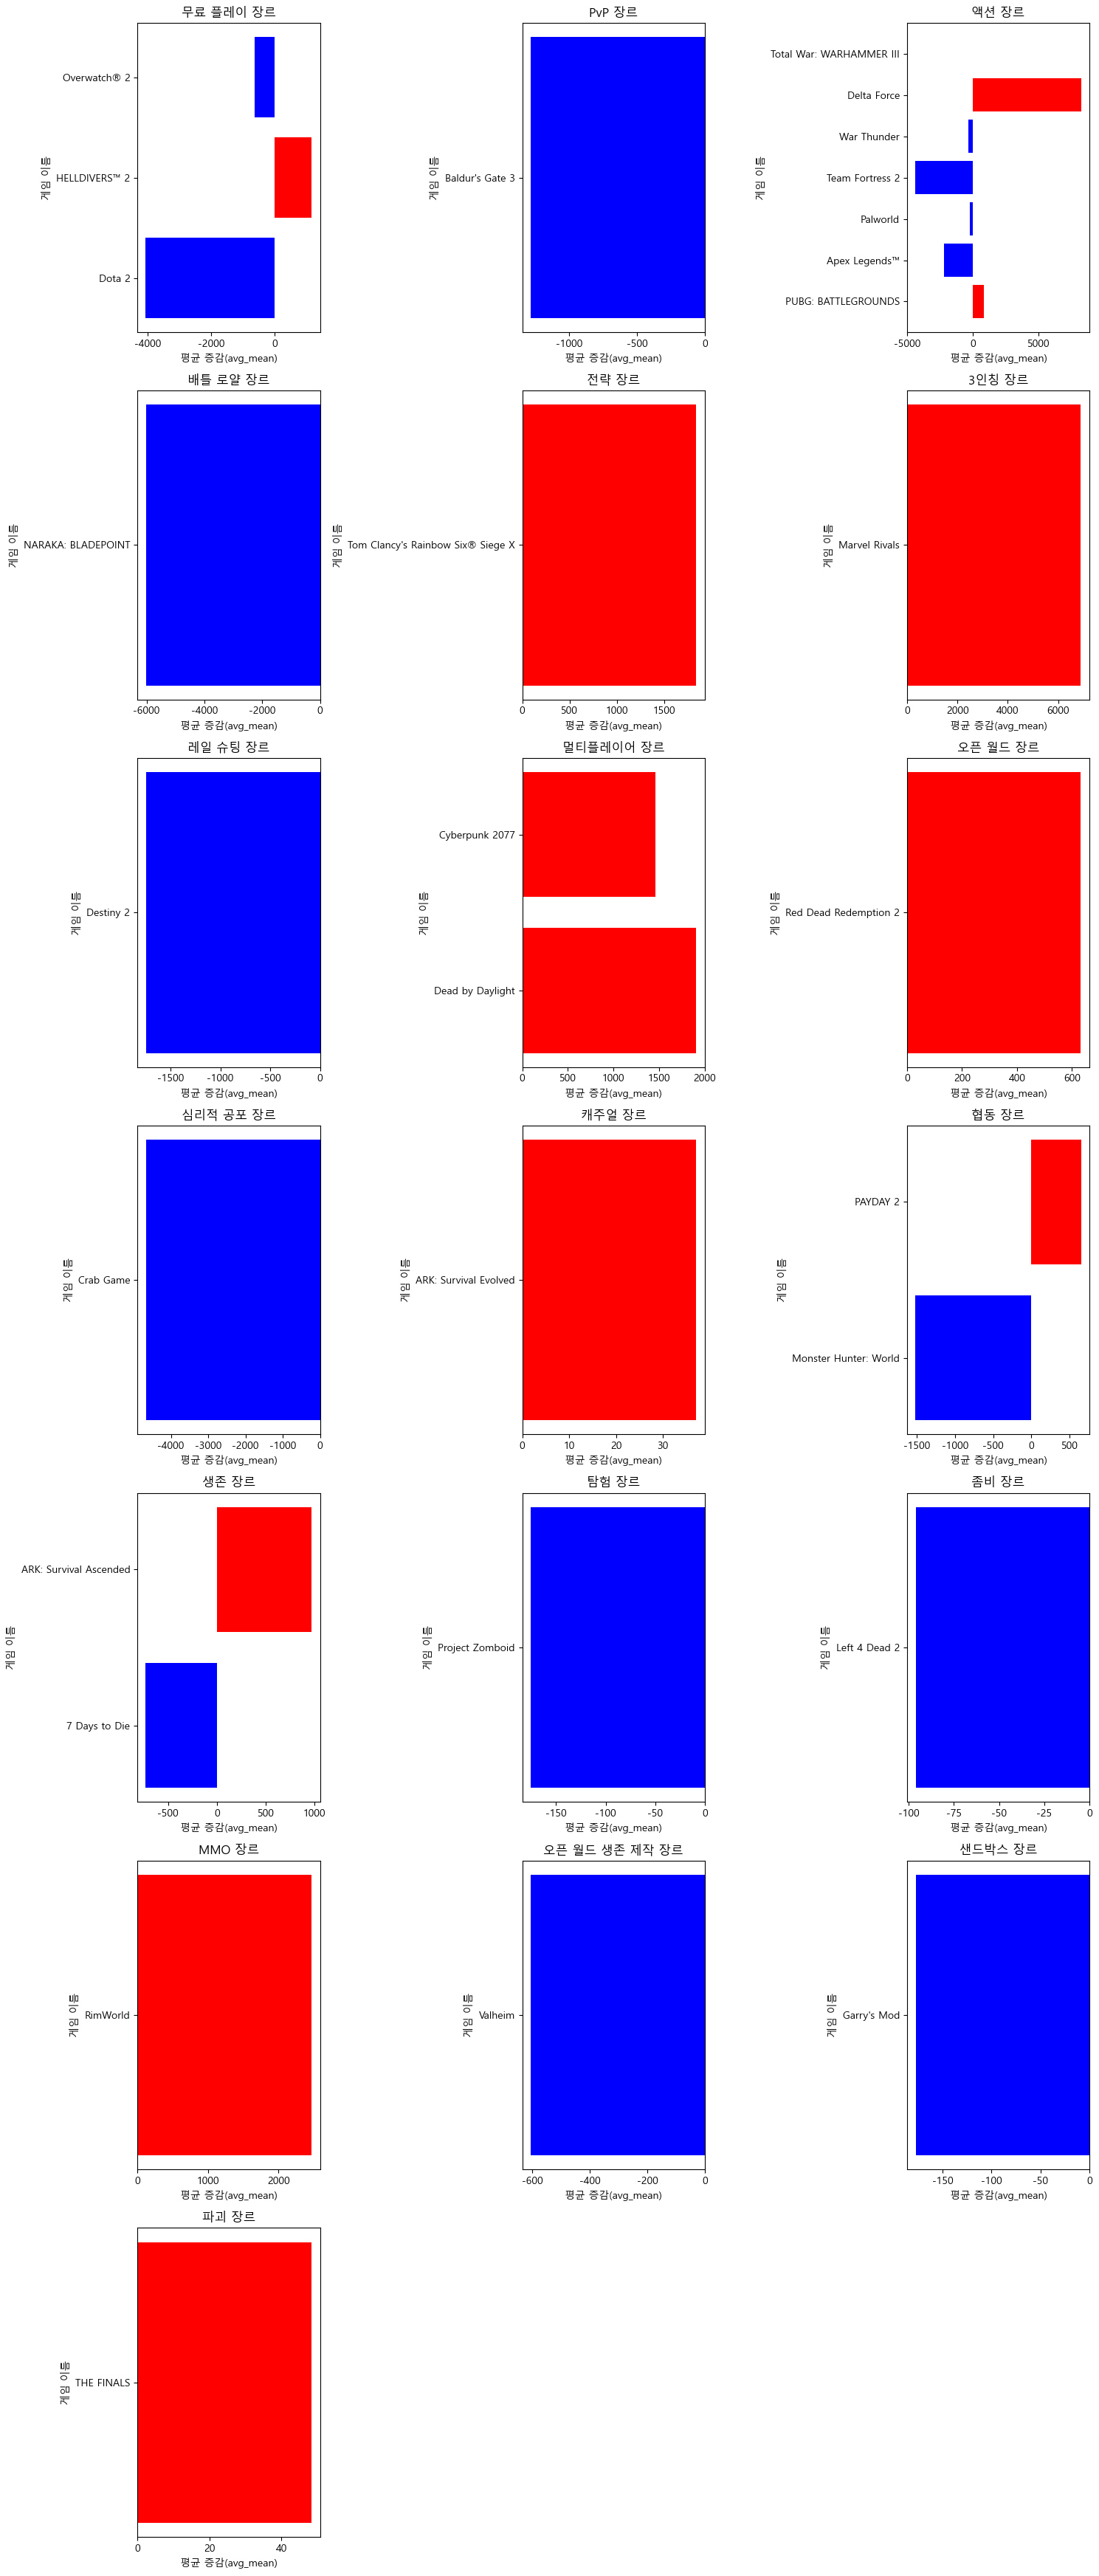

In [11]:
import matplotlib.pyplot as plt
import math

# 1. 조건 필터링: 유저 수 > 10000, 상위 30개 게임
df_filtered = df[df['avg_monthly_avg'] > 10000].sort_values(by='avg_monthly_avg', ascending=False).head(30).copy()

# 2. 장르 목록: 상위 게임 기준으로 유저 수가 많은 순서
genre_order = df_filtered.groupby('main_genre')['avg_monthly_avg'].mean().sort_values(ascending=False).index.tolist()

# 3. 서브플롯 설정 (한 행에 3개)
cols = 3
rows = math.ceil(len(genre_order) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()

# 4. 장르별 그래프
for i, genre in enumerate(genre_order):
    genre_data = df_filtered[df_filtered['main_genre'] == genre].copy()

    # 색상: 증가 → 빨강, 감소 → 파랑
    colors = ['red' if x > 0 else 'blue' for x in genre_data['avg_mean']]

    axes[i].barh(genre_data['game_name'], genre_data['avg_mean'], color=colors)
    axes[i].set_title(f"{genre} 장르", fontsize=12)
    axes[i].set_xlabel("평균 증감(avg_mean)")
    axes[i].set_ylabel("게임 이름")

# 5. 남는 subplot 비우기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



- 대부분 장르별 게임 수가 적은 편(대략 1개정도)
- 무료 플레이, 액션 장르는 다른 게임들은 전부 유저 수가 감소하는 추세지만 헬 다이버즈, 배그, 델타포스는 유저 수가 증가하고 있는 추세
- 3인칭, 전략, 멀티플레이어, MMO 장르의 게임들은 타 게임들에 비해 높은 유저 수 증가율을 보여줌

- 월 평균 접속자 수가 만 명 이상 게임들의 차이점 비교

In [12]:
# 긍정비율 열 추가
df_filtered['positive_ratio'] = df_filtered.apply(
    lambda row: row['positive_reviews'] / row['all_reviews'] if row['all_reviews'] > 0 else 0,
    axis=1
)

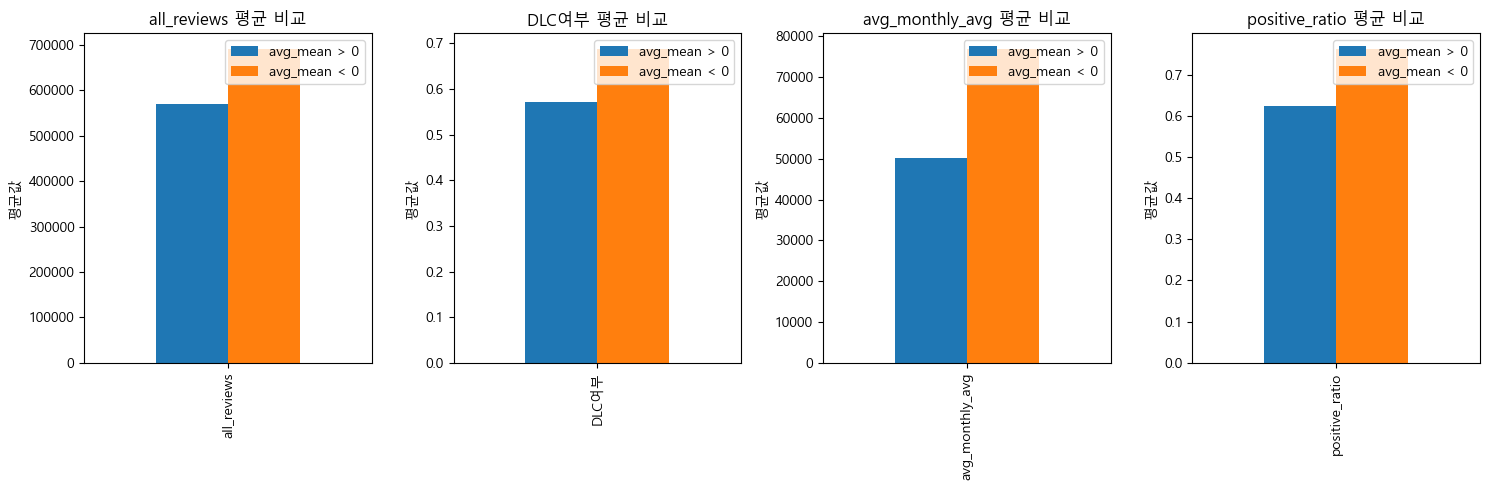

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# 조건별 데이터
pos_group = df_filtered[(df_filtered['avg_monthly_avg'] > 10000) & (df_filtered['avg_mean'] > 0)]
neg_group = df_filtered[(df_filtered['avg_monthly_avg'] > 10000) & (df_filtered['avg_mean'] < 0)]

# 비교할 열
cols = ['all_reviews', 'DLC여부', 'avg_monthly_avg', 'positive_ratio']

# 평균 계산
pos_mean = pos_group[cols].mean()
neg_mean = neg_group[cols].mean()

# DataFrame으로 합치기
mean_df = pd.DataFrame({
    'avg_mean > 0': pos_mean,
    'avg_mean < 0': neg_mean
})

# 한 행에 3개씩 배치
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# 2차원 배열 → 1차원으로 변환
axes = axes.flatten()

for i, col in enumerate(cols):
    mean_df.loc[[col]].plot(kind='bar', ax=axes[i], legend=True)
    axes[i].set_title(f"{col} 평균 비교")
    axes[i].set_ylabel("평균값")

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



- 만 명 이상의 게임들에서 유저 수가 감소하고 있는 게임들의 긍정 리뷰 비율, 월 평균 접속자 수가 높은 경향이 있음

- 전체 데이털 비교

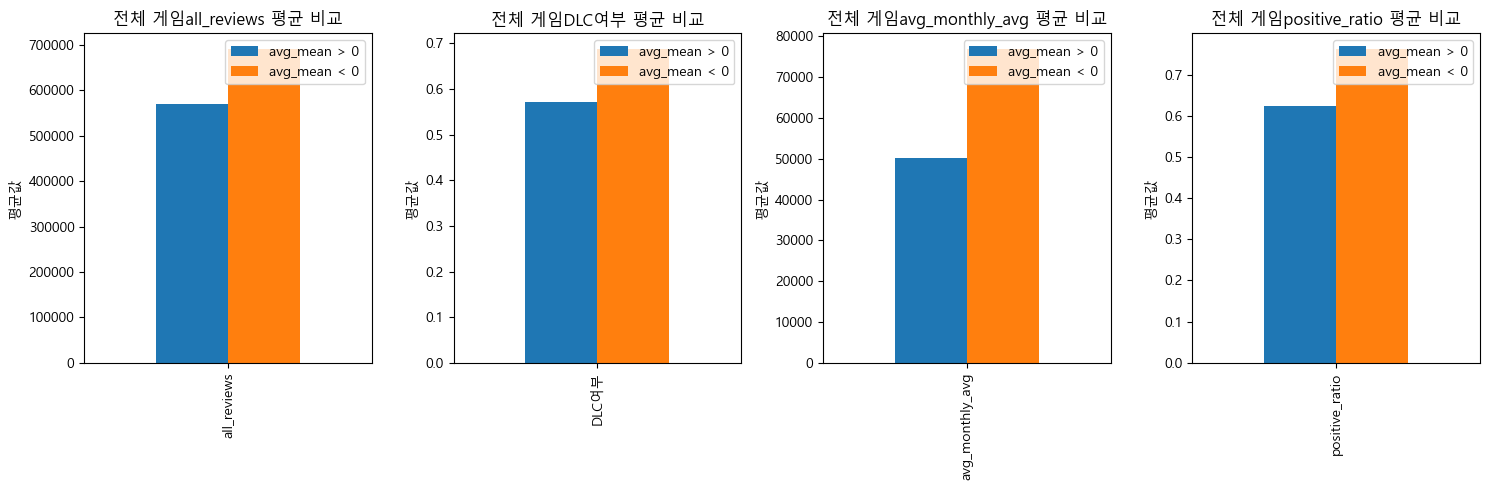

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# 조건별 데이터
pos_group = df_filtered[df_filtered['avg_mean'] > 0]
neg_group = df_filtered[df_filtered['avg_mean'] < 0]

# 비교할 열
cols = ['all_reviews', 'DLC여부', 'avg_monthly_avg', 'positive_ratio']

# 평균 계산
pos_mean = pos_group[cols].mean()
neg_mean = neg_group[cols].mean()

# DataFrame으로 합치기
mean_df = pd.DataFrame({
    'avg_mean > 0': pos_mean,
    'avg_mean < 0': neg_mean
})

# 한 행에 3개씩 배치
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# 2차원 배열 → 1차원으로 변환
axes = axes.flatten()

for i, col in enumerate(cols):
    mean_df.loc[[col]].plot(kind='bar', ax=axes[i], legend=True)
    axes[i].set_title(f"전체 게임{col} 평균 비교")
    axes[i].set_ylabel("평균값")

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- 전체 데이터도 비슷한 경향으로 유저 수가 감소하고 있는 게임들이 월 평균 유저수, 긍정 리뷰 비율이 높은 경향
- 유저 수가 감소하고 있는 게임은 현재 시장에서 인기가 있는 게임들로 판단됨

- 오버워치와 다른 게임들을 비교

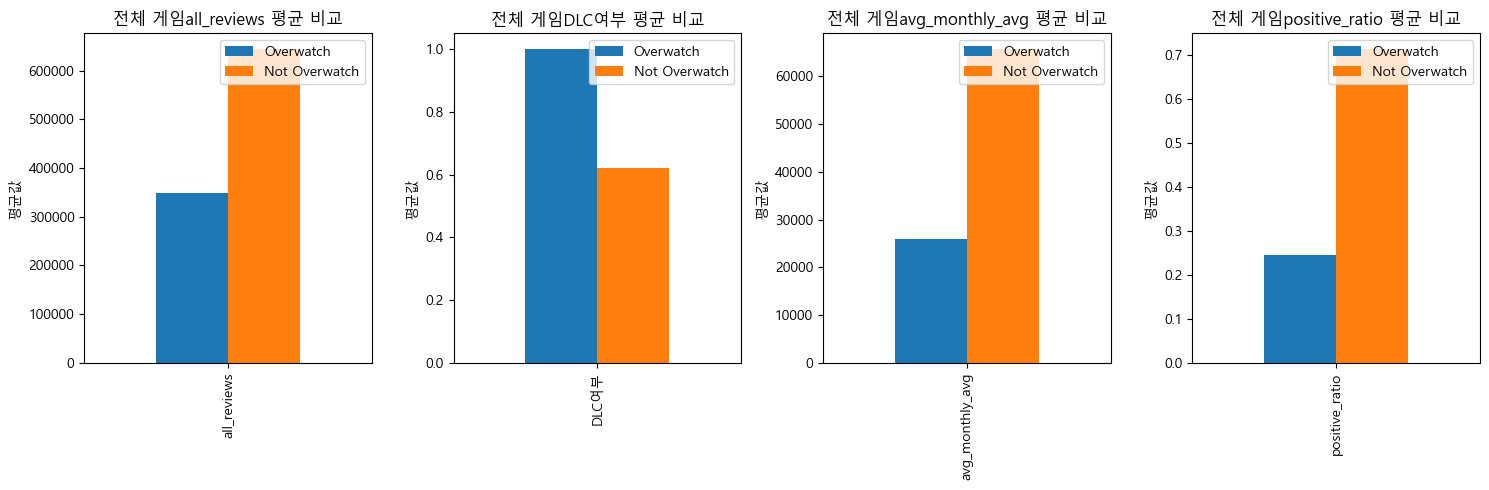

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# 조건별 데이터
pos_group = df_filtered[df_filtered['game_name'].str.contains('Overwatch')]
neg_group = df_filtered[(~df_filtered['game_name'].str.contains('Overwatch')) & (df_filtered['avg_monthly_avg'] > 10000)]

# 비교할 열
cols = ['all_reviews', 'DLC여부', 'avg_monthly_avg', 'positive_ratio']

# 평균 계산
pos_mean = pos_group[cols].mean()
neg_mean = neg_group[cols].mean()

# DataFrame으로 합치기
mean_df = pd.DataFrame({
    'Overwatch': pos_mean,
    'Not Overwatch': neg_mean
})

# 한 행에 3개씩 배치
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# 2차원 배열 → 1차원으로 변환
axes = axes.flatten()

for i, col in enumerate(cols):
    mean_df.loc[[col]].plot(kind='bar', ax=axes[i], legend=True)
    axes[i].set_title(f"전체 게임{col} 평균 비교")
    axes[i].set_ylabel("평균값")

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- 오버워치와 유저 수 만 명 이상인 게임들을 비교 했을 때 가장 큰 차이는 긍정 리뷰 비율로
- 오버워치는 현재 긍정 리뷰 비율이 약 0.25 정도 이지만 상위 게임은 0.7이상으로 큰 차이가 존재함

- 무료 플레이, 액션 장르는 전체 게임들이 감소하는 추세지만 헬 다이버즈(무료플레이), 배그(액션), 델타포스(액션)는 유저 수가 증가하고 있는 추세
- 마블 라이벌즈(3인칭), 림월드(MMO), 레식(전략), 사펑(멀티플레이어), 데바데(멀티플레이어)는 다른 게임들에 비해 높은 유저 수 증가율을 보여주는 게임들

- 해당 게임들과 아닌 게임들을 비교

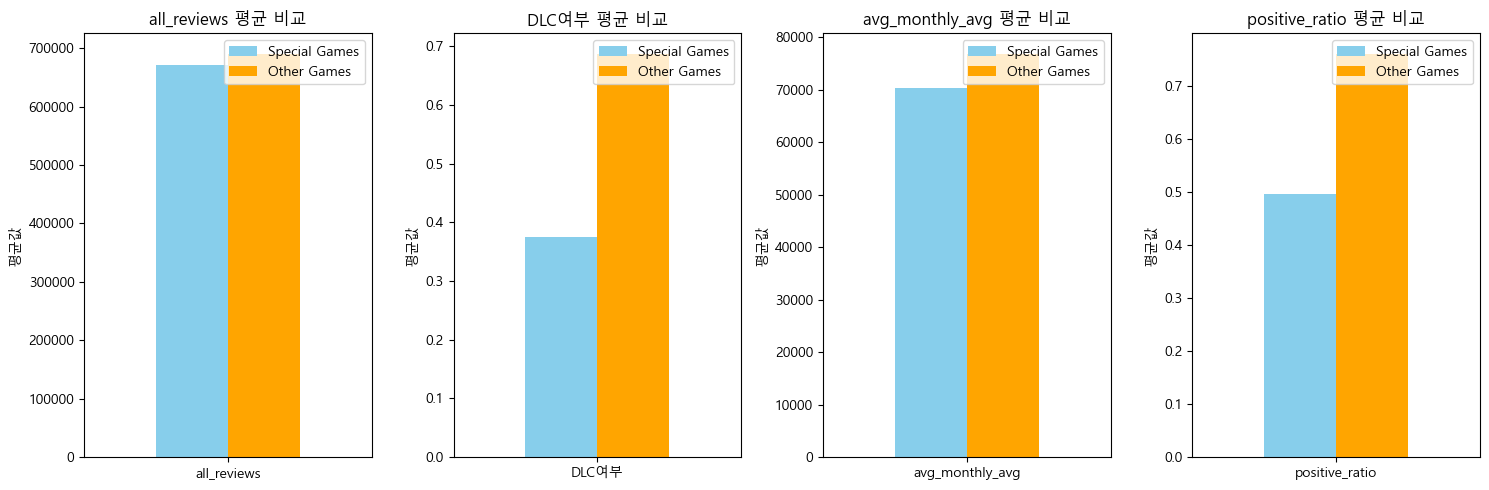

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# 1. 게임 목록 정의
special_games = [
    'HELLDIVERS™ 2', 'PUBG: BATTLEGROUNDS', 'Delta Force', 
    'Marvel Rivals', 'RimWorld', "Tom Clancy's Rainbow Six® Siege X",
    'Cyberpunk 2077', 'Dead by Daylight'
]

# 2. 조건별 데이터
group_special = df_filtered[df_filtered['game_name'].isin(special_games)]
group_others = df_filtered[(~df_filtered['game_name'].isin(special_games)) & (df_filtered['avg_mean'] < 0)]

# 3. 비교할 열
cols = ['all_reviews', 'DLC여부', 'avg_monthly_avg', 'positive_ratio']

# 4. 평균 계산
mean_special = group_special[cols].mean()
mean_others = group_others[cols].mean()

# 5. DataFrame으로 합치기
mean_df = pd.DataFrame({
    'Special Games': mean_special,
    'Other Games': mean_others
})

# 6. 서브플롯 설정 (한 행에 4개)
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# 7. 시각화
for i, col in enumerate(cols):
    mean_df.loc[[col]].plot(kind='bar', ax=axes[i], color=['skyblue','orange'], legend=True)
    axes[i].set_title(f"{col} 평균 비교")
    axes[i].set_ylabel("평균값")
    axes[i].set_xticklabels([col], rotation=0)

# 8. 남는 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- 위에서 언급한 특정 게임과 유저 수가 감소하고 있는 게임을 비교했을 때에는
- 리뷰 수, 월 평균 유저수, 긍정 리뷰 비율 모두 적은 게임이 유저 수 증가수치가 높은 경향이 있음
- 따라서, 유저 수 증감원인의 가장 큰 요인으로는 현재 데이터가 아닌 마케팅, 업데이트 내용 등일 것이라 추측됨

-> 오버워치가 속한 무료 플레이 장르는 전반적으로 유저 수가 감소하는 추세이지만 헬 다이버즈만 유저 수가 증가하고 있는 추세
-> 해당 게임의 마케팅, 업데이트 내용을 추가 분석해서 벤치마킹 요소로 활용 가능
-> 추가로, 배그, 델타포스, 마블라이벌즈, 림월드, 레식, 사펑, 데바데는 각 장르 중에서 유저 수 증가가 높은 케이스로 해당 게임들에 대한 마케팅, 업데이트 내용 추가 분석 필요

## 상관계수

In [17]:
# 긍정비율 열 추가
df['positive_ratio'] = df.apply(
    lambda row: row['positive_reviews'] / row['all_reviews'] if row['all_reviews'] > 0 else 0,
    axis=1
)

In [18]:
df.drop(['Avg_change_mean', 'Avg_change_pct'], axis=1, inplace=True)

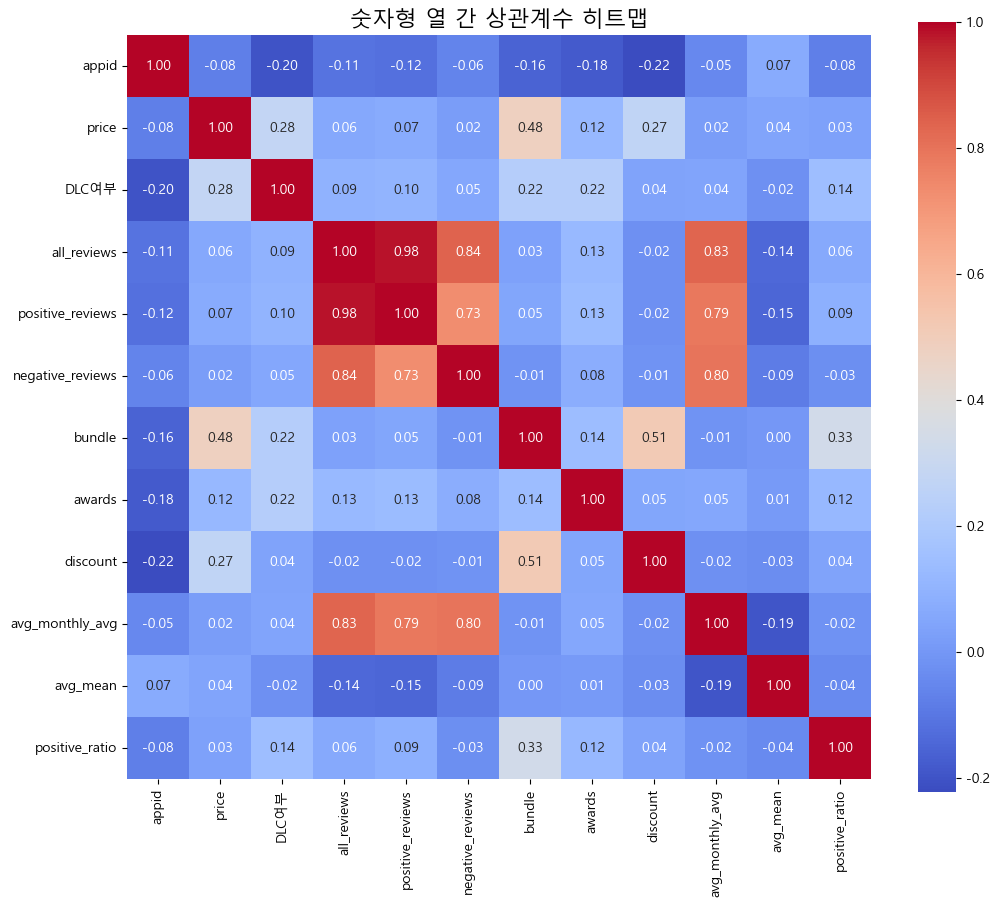

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 숫자형 열만 선택
num_df = df.select_dtypes(include=['int64', 'float64'])

# 2. 상관계수 계산
corr = num_df.corr()

# 3. 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("숫자형 열 간 상관계수 히트맵", fontsize=16)
plt.show()



- 가격과 번들(0.48), 가격과 DLC여부(0.28), DLC여부와 번들 및어워드(0.22) 로
- 가격이 높을 수록 번들을 판매하는 경향이 있고 DLC를 판매하는데에도 어느정도 관계가 있음
- DLC 여부가 번들 판매와 수상 여부에도 어느 정도 관계가 있음
- 전체, 긍정, 부정 리뷰 수가 월 평균 유저 수와 매우 강한 관계가 있음
- 할인률과 번들판매간의 어느정도 관계가 있는 편

- 월 평균 유저수 증감에는 다른 열들과 별로 관계가 없는 편
- 긍정 리뷰 비율은 번들 여부와 어느정도 약한 관계가 있는편

-> 번들로 판매할 시 사람들의 긍정적인 리뷰를 유도할 수 있으며 이는 마케팅 요소로 활용 가능

## 가격대별 접속자수

In [20]:
# 가격별로 그룹화 후, 최고 접속자와 평균 접속자의 평균값 계산
price_stats = df.groupby('price').agg({
    'avg_mean': 'mean'
}).reset_index()

# 가격 기준 오름차순 정렬
price_stats = price_stats.sort_values('price')

# 결과 출력
price_stats

,price,avg_mean
0,0,-4.443969
1,820,-0.008333
2,900,0.000000
3,920,-0.108333
4,1000,0.041667
...,...,...
375,94800,-8.770833
376,110000,-67.525000
377,130000,-8.925000
378,138100,-1.125000


가격대 별로 나누어서 시각화

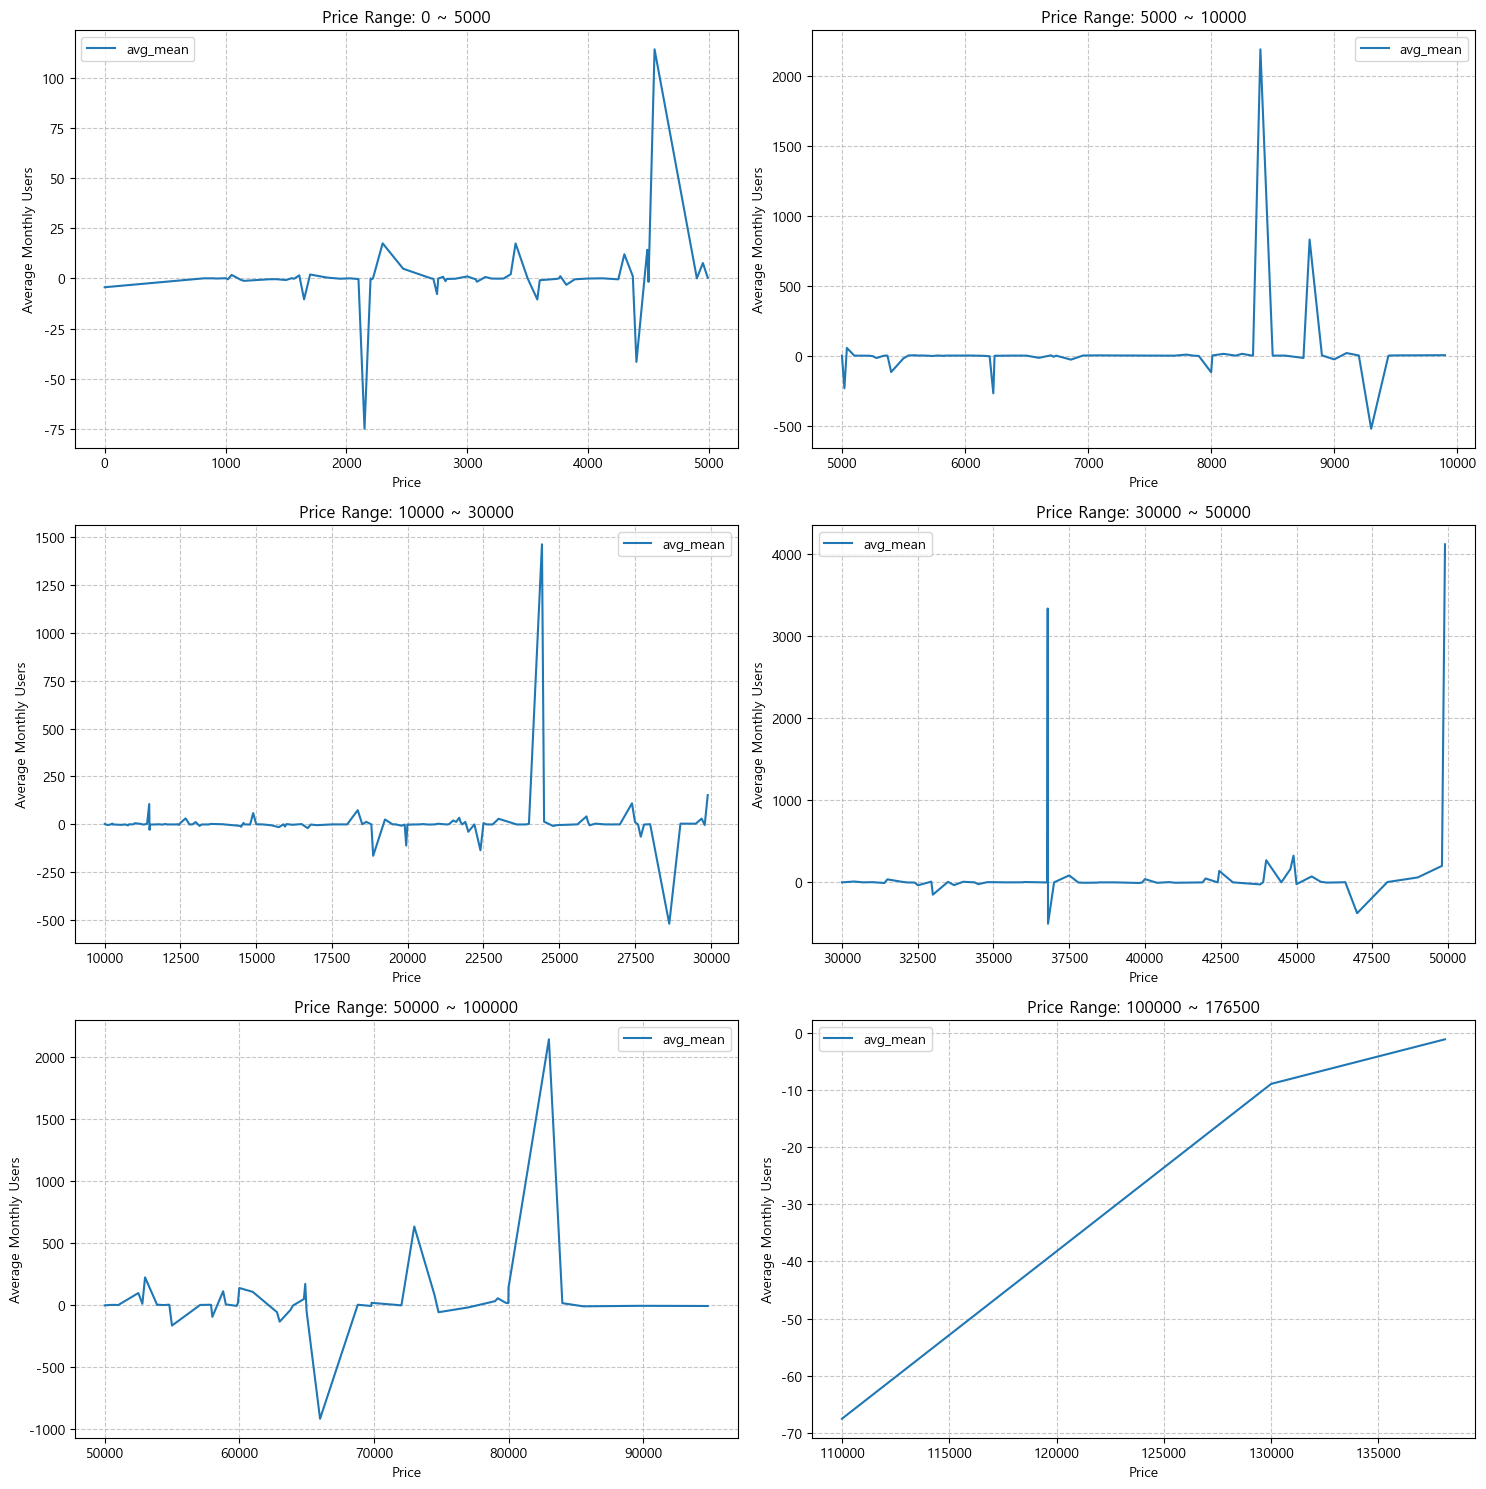

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 가격 구간 리스트 (범위의 끝 포함)
price_ranges = [
    (0, 5000),
    (5000, 10000),
    (10000, 30000),
    (30000, 50000),
    (50000, 100000),
    (100000, price_stats['price'].max())
]

# 서브플롯 행,열 설정 (예: 3행 2열)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()  # 2차원 배열을 1차원 리스트로 변환

for i, (low, high) in enumerate(price_ranges):
    ax = axes[i]
    # 구간 필터링
    subset = price_stats[(price_stats['price'] >= low) & (price_stats['price'] < high)]
    
    sns.lineplot(data=subset, x='price', y='avg_mean', label='avg_mean', ax=ax)
    
    ax.set_title(f'Price Range: {low} ~ {high}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Average Monthly Users')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

plt.tight_layout()
plt.show()

- 0 ~ 5,000원 :
다른 가격대에 비해 유저 수 증감 수치가 크지 않은 구간,
다른 가격대에 비해 꾸준히 접속하는 유저(충성 유저)층이 뚜렷한 가격대

- 5,000 ~ 10,000원 : 
8000 ~ 9000원 사이에서 두 번의 유저 증가 수치 확인됨
해당 게임이 뭔지 파악

- 10,000 ~ 30,000원
24000원 쯤 큰 유저 증가수치 확인

- 30,000 ~ 50,000원
월 평균 유저수 증감 수치가 가장 크게 존재하는 구간,
이 구간 게임은 게임을 구매하고 꾸준히 플레이가 아닌 일회성 플레이가 주로 이루어지는 게임일 가능성이 있음

- 50,000 ~ 100,000원
유저 수 증감수치가 다른 구간에 비해 크진 않지만 여러 게임에서 유저 수가 증감하고 있는 구간

- 100,000원 ~ 
유저 수가 계속 감소만 하는 구간

- 일반적으로는 월 평균 유저수 증감 수치가 500을 넘어가지 않음, 2천과 4천이 넘는 증감수치를 가진 게임과 무료게임 비교

In [22]:
df[(df['price'] > 8100) & (df['price'] < 8600)][['game_name', 'avg_mean', 'price']].sort_values(by='avg_mean', ascending=False)

,game_name,avg_mean,price
3141,PEAK,4366.750000,8400
2854,"Ranch Simulator: Build, Hunt, Farm",26.733333,8250
1540,Trainz Railroad Simulator 2022,8.016667,8400
1515,Aliens vs. Ghosts,0.150000,8340
2808,Joint Task Force,0.058333,8500
2176,NoReload Heroes,0.000000,8500
2474,The Bug Butcher,0.000000,8500
2450,Tasty Planet: Back for Seconds,0.000000,8500
2568,Tasty Blue,-0.016667,8500
2758,Farming Simulator 2011,-0.091667,8500


- 2번 구간에서의 유저수 증감수치가 크게 나온 원인은 피크

In [23]:
df[(df['price'] > 23000) & (df['price'] < 25000)][['game_name', 'avg_mean', 'price']].sort_values(by='avg_mean', ascending=False)

,game_name,avg_mean,price
3169,Cyberpunk 2077,1461.325000,24430
3339,Resident Evil 5,23.916667,24800
2925,TopSpin 2K25,13.958333,24500
1750,CryoFall,9.508333,24000
17,Unrailed!,5.941667,24000
3067,Resident Evil Revelations 2,1.300000,24800
87,Witch It,0.608333,24000
3280,Umbrella Corps,0.408333,24800
2884,Fling to the Finish,0.191667,24000
2111,MY HERO ONE'S JUSTICE,0.066667,24800


- 3번 구간은 사펑

In [24]:
df[(df['price'] > 36000) & (df['price'] < 37500)][['game_name', 'avg_mean', 'price']].sort_values(by='avg_mean', ascending=False)

,game_name,avg_mean,price
2963,Grand Theft Auto V Enhanced,3331.425000,36790
2070,Devil May Cry 5,12.408333,36800
780,The Smurfs – Dreams,0.408333,37000
1738,Ghosts 'n Goblins Resurrection,-0.383333,36800
1045,STAR WARS™: Battlefront Classic Collection,-0.883333,36770
18,Monster Hunter: World,-1522.133333,36800


In [25]:
df[(df['price'] > 49000) & (df['price'] < 50000)][['game_name', 'avg_mean', 'price']].sort_values(by='avg_mean', ascending=False)

,game_name,avg_mean,price
2831,Dune: Awakening,4112.783333,49900
3304,ELDEN RING NIGHTREIGN,3763.925000,49800
3147,Ace Attorney Investigations Collection,21.458333,49800
3008,SYNDUALITY Echo of Ada,17.025000,49800
3125,SONIC X SHADOW GENERATIONS,13.850000,49800
2875,Resident Evil 3,13.641667,49800
719,FREEDOM WARS Remastered,3.275000,49800
3221,Team Sonic Racing™,-0.116667,49800
2398,GOD EATER 2 Rage Burst,-0.158333,49800
247,MY HERO ONE'S JUSTICE 2,-0.241667,49800


- 4번 구간은 GTA, 몬헌와일드, 듄, 엘든링 

In [26]:
df[(df['price'] > 80000) & (df['price'] < 85000)][['game_name', 'avg_mean', 'price']].sort_values(by='avg_mean', ascending=False)

,game_name,avg_mean,price
3081,NBA 2K25,2140.625000,83000
3092,RPG Maker MZ,14.108333,84000


- 5번 구간은 NBA

In [27]:
df[(df['price'] == 0)][['game_name', 'avg_mean', 'price']].sort_values(by='avg_mean', ascending=False).head(20)

,game_name,avg_mean,price
3196,Delta Force,8268.341667,0
3143,Marvel Rivals,6902.091667,0
3247,Tom Clancy's Rainbow Six® Siege X,1836.041667,0
3215,Mecha BREAK,1819.416667,0
3306,PUBG: BATTLEGROUNDS,822.041667,0
3082,Wuthering Waves,772.400000,0
496,Off The Grid,599.016667,0
432,Supermarket Together,467.475000,0
3019,eFootball™,411.766667,0
866,SMITE 2,319.783333,0


In [28]:
df[(df['price'] == 0)][['game_name', 'avg_mean', 'price']].sort_values(by='avg_mean', ascending=True).head(20)

,game_name,avg_mean,price
19,NARAKA: BLADEPOINT,-6013.191667,0
1644,Crab Game,-4664.766667,0
3023,Team Fortress 2,-4383.825000,0
11,Dota 2,-4060.083333,0
3127,Apex Legends™,-2181.675000,0
348,Governor of Poker 3,-1897.125000,0
139,Dark and Darker,-1894.508333,0
3245,Destiny 2,-1744.091667,0
2826,Overwatch® 2,-622.291667,0
3075,Hero's Land,-619.408333,0


In [29]:
df[df['avg_monthly_avg'] > 10000].describe()

,appid,price,DLC여부,all_reviews,positive_reviews,negative_reviews,bundle,awards,discount,avg_monthly_avg,avg_mean,positive_ratio
count,5.600000e+01,56.000000,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,9.597889e+05,24028.392857,0.714286,4.387754e+05,3.583515e+05,8.042393e+04,0.732143,0.464286,27.017857,40664.523512,-6.555655,0.749731
std,8.593396e+05,24907.233982,0.455842,5.268533e+05,4.042519e+05,1.600991e+05,0.446850,0.503236,34.723056,68362.095309,2212.322311,0.275084
min,4.400000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,10014.979167,-6013.191667,0.000000
25%,2.934625e+05,0.000000,0.000000,1.151502e+05,8.595100e+04,9.905500e+03,0.000000,0.000000,0.000000,12869.069792,-635.810417,0.701731
50%,6.671400e+05,17425.000000,1.000000,2.705075e+05,2.240915e+05,3.122350e+04,1.000000,0.000000,0.000000,20348.277083,-62.529167,0.832529
75%,1.212418e+06,42500.000000,1.000000,5.361890e+05,4.807650e+05,6.890200e+04,1.000000,1.000000,50.000000,32323.814583,637.037500,0.928730
max,3.240220e+06,83000.000000,1.000000,2.587983e+06,2.062547e+06,1.046905e+06,1.000000,1.000000,100.000000,438166.600000,8268.341667,0.983047


- 가격이 높아질수록 월 평균 유저 수 감소폭이 큼
- 낮은 가격일수록 게임을 꾸준히 플레이 하는 경향이 높다고 판단됨

## SNS 채널별 접속자 수

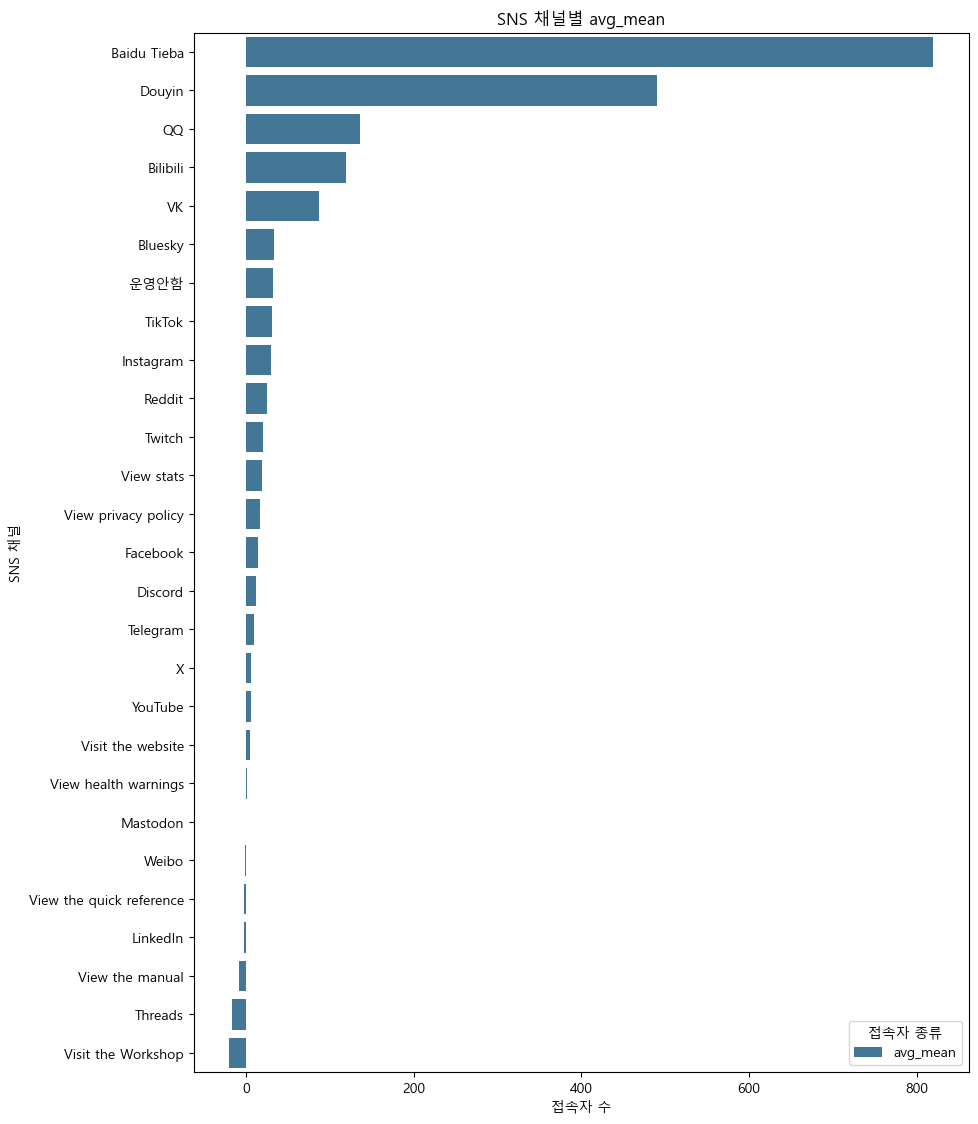

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SNS 채널 열 분리 (쉼표 기준)
sns_exploded = (
    df.assign(sns_channels=df['sns_channels'].str.split(','))
      .explode('sns_channels')
)

# 공백 제거
sns_exploded['sns_channels'] = sns_exploded['sns_channels'].str.strip()

# SNS 채널별 평균 최고/평균 접속자 수 계산
sns_avg = (
    sns_exploded.groupby('sns_channels')[['avg_mean']]
    .mean()
    .sort_values('avg_mean', ascending=False)
)

# 시각화를 위해 melt 형태로 변환
sns_avg_melted = sns_avg.reset_index().melt(
    id_vars='sns_channels',
    value_vars=['avg_mean'],
    var_name='접속자_종류',
    value_name='접속자수'
)

# 시각화
plt.figure(figsize=(10, len(sns_avg)*0.5))
sns.barplot(
    data=sns_avg_melted,
    x='접속자수',
    y='sns_channels',
    hue='접속자_종류',
    palette='mako'
)
plt.xlabel('접속자 수')
plt.ylabel('SNS 채널')
plt.title('SNS 채널별 avg_mean')
plt.legend(title='접속자 종류')
plt.show()

- 전반적으로 SNS 채널을 운영한다면 유저 수는 증가하는 경향이 있음
- 실제 게임사가 SNS를 운영할 시 유저 수 증가에 영향을 끼치는 것에 근거가 됨

- Baidu Tieba(중국 검색엔진), Douyin(중국 숏폼 플랫폼), QQ(중국 메신저), Bilibili(중국 인터넷 방송 플랫폼), VK(러시아 SNS) 를 운영하는 게임들의 유저 수 증가 수치가 큰 경향이 있음
- 해당 채널을 운영하는 게임들을 확인해볼 필요성이 있음

- 그 외로는, 운영을 안하거나, 틱톡, 인스타그램, 레딧, 페이스북, 디스코드, X, 유튜브 순

- SNS를 몇 개를 운영하는지에 따라 차이가 나는지 확인

C:\Users\user\AppData\Local\Temp\ipykernel_28488\1658932067.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_by_sns, x='sns_count', y='avg_mean', palette='magma')


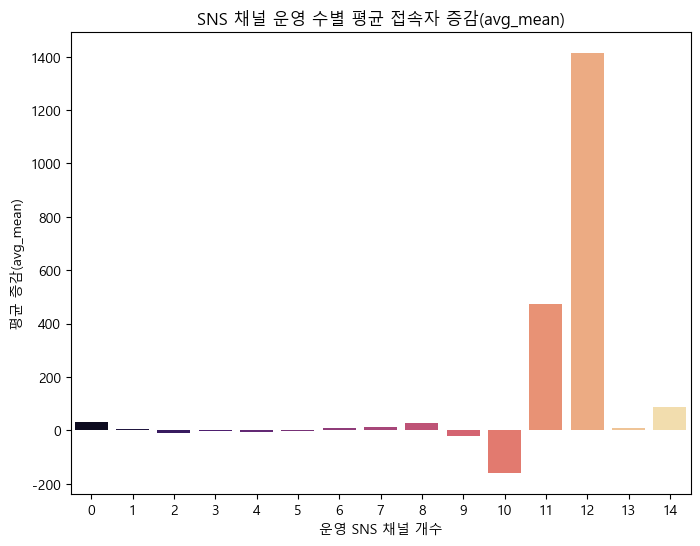

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. sns 채널 개수 계산 (없으면 0)
df['sns_count'] = df['sns_channels'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '운영안함' else len(x.split(',')))

# 2. sns_count별 avg_mean 평균 계산
avg_by_sns = df.groupby('sns_count')['avg_mean'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(8,6))
sns.barplot(data=avg_by_sns, x='sns_count', y='avg_mean', palette='magma')
plt.title("SNS 채널 운영 수별 평균 접속자 증감(avg_mean)")
plt.xlabel("운영 SNS 채널 개수")
plt.ylabel("평균 증감(avg_mean)")
plt.show()



- sns를 11, 12개 운영할 때 유저 수의 증가 수치가 가장 크게 나타남
- sns를 적게 운영할시 유저 수 증감에 영향이 거의 없는 편이고 너무 많이 운영해도 영향을 별로 끼치지 않음
- 다만 10개를 운영할 때에는 유저 수가 감소하는 경향이 있음

- 중국 채널을 운영하는 게임과 11, 12개를 운영하는 게임 파악

In [32]:
df[(df['sns_channels'].str.contains('Baidu Tieba')) | (df['sns_channels'].str.contains('Douyin')) | (df['sns_channels'].str.contains('QQ'))].sort_values('avg_mean', ascending=False)[['game_name', 'avg_monthly_avg', 'avg_mean']]

,game_name,avg_monthly_avg,avg_mean
3143,Marvel Rivals,56526.458333,6902.091667
2831,Dune: Awakening,6332.591667,4112.783333
3306,PUBG: BATTLEGROUNDS,276576.087500,822.041667
37,FragPunk,2626.837500,237.575000
2988,KARDS - The WW2 Card Game,1577.625000,224.866667
2824,The Spell Brigade,993.312500,210.175000
3271,He is Coming,88.408333,176.816667
3283,美女，请别影响我成仙,327.979167,163.183333
677,Alpha League HD,594.237500,116.666667
2898,BLACK STIGMA,44.816667,89.633333


- 중국 채널을 운영하는 게임에는 마블 라이벌즈, 듄, 배그 순

In [33]:
df[(df['sns_count'] == 11) | (df['sns_count'] == 12)].sort_values('avg_mean', ascending=False)[['game_name', 'avg_monthly_avg', 'avg_mean', 'sns_count']]

,game_name,avg_monthly_avg,avg_mean,sns_count
3143,Marvel Rivals,56526.458333,6902.091667,12
2831,Dune: Awakening,6332.591667,4112.783333,11
274,PAYDAY 2,21515.575000,652.225000,11
866,SMITE 2,1635.345833,319.783333,11
698,Sniper Elite: Resistance,280.883333,71.941667,12
3113,Kingdom Two Crowns,1302.079167,52.666667,12
3228,Into the Dead: Our Darkest Days,205.137500,35.283333,11
189,STALCRAFT: X,8405.720833,35.108333,12
3166,Forza Horizon 5,11711.175000,29.800000,11
665,War Robots: Frontiers,115.604167,23.608333,11


- 12개를 운영하는 게임은 마블 라이벌즈, 스나이퍼 엘리트, 킹덤 투 크라운, 스타크래프트, 퓨리 언리시드
- 11개를 운영하는 게임은 듄, 페이데이2, 스마이트2 순

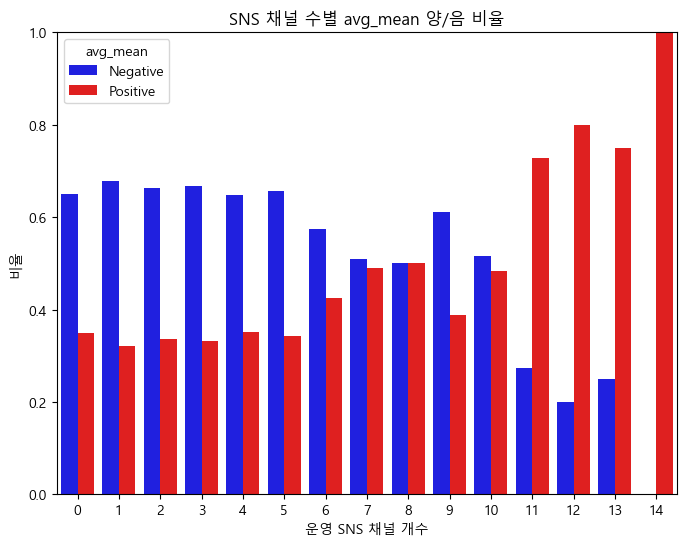

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. sns 채널 개수 계산
df['sns_count'] = df['sns_channels'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '운영안함' else len(x.split(',')))

# 2. avg_mean 양/음 구분 열 생성
df['avg_sign'] = df['avg_mean'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# 3. sns_count별 Positive/Negative 비율 계산
ratio_df = (
    df.groupby(['sns_count', 'avg_sign'])
    .size()
    .reset_index(name='count')
)

# 4. sns_count별 총 게임 수 계산
total_games = df.groupby('sns_count').size().reset_index(name='total')
ratio_df = ratio_df.merge(total_games, on='sns_count')
ratio_df['ratio'] = ratio_df['count'] / ratio_df['total']

# 5. 누적 막대그래프 시각화
plt.figure(figsize=(8,6))
sns.barplot(data=ratio_df, x='sns_count', y='ratio', hue='avg_sign', palette={'Positive':'red','Negative':'blue'})
plt.title("SNS 채널 수별 avg_mean 양/음 비율")
plt.xlabel("운영 SNS 채널 개수")
plt.ylabel("비율")
plt.ylim(0,1)
plt.legend(title='avg_mean')
plt.show()


- SNS 채널을 적게 운영할 수록 유저 수 감소하는 경향이 더 뚜렷해 지고
- 6개를 운영할 때부터 유저 수가 증가하는 경향이 보임

- SNS 채널별 월 평균 유저수 증가 수치가 높은 게임 분석

C:\Users\user\AppData\Local\Temp\ipykernel_28488\3228991622.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_28488\3228991622.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_28488\3228991622.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_28488\3228991622.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` 

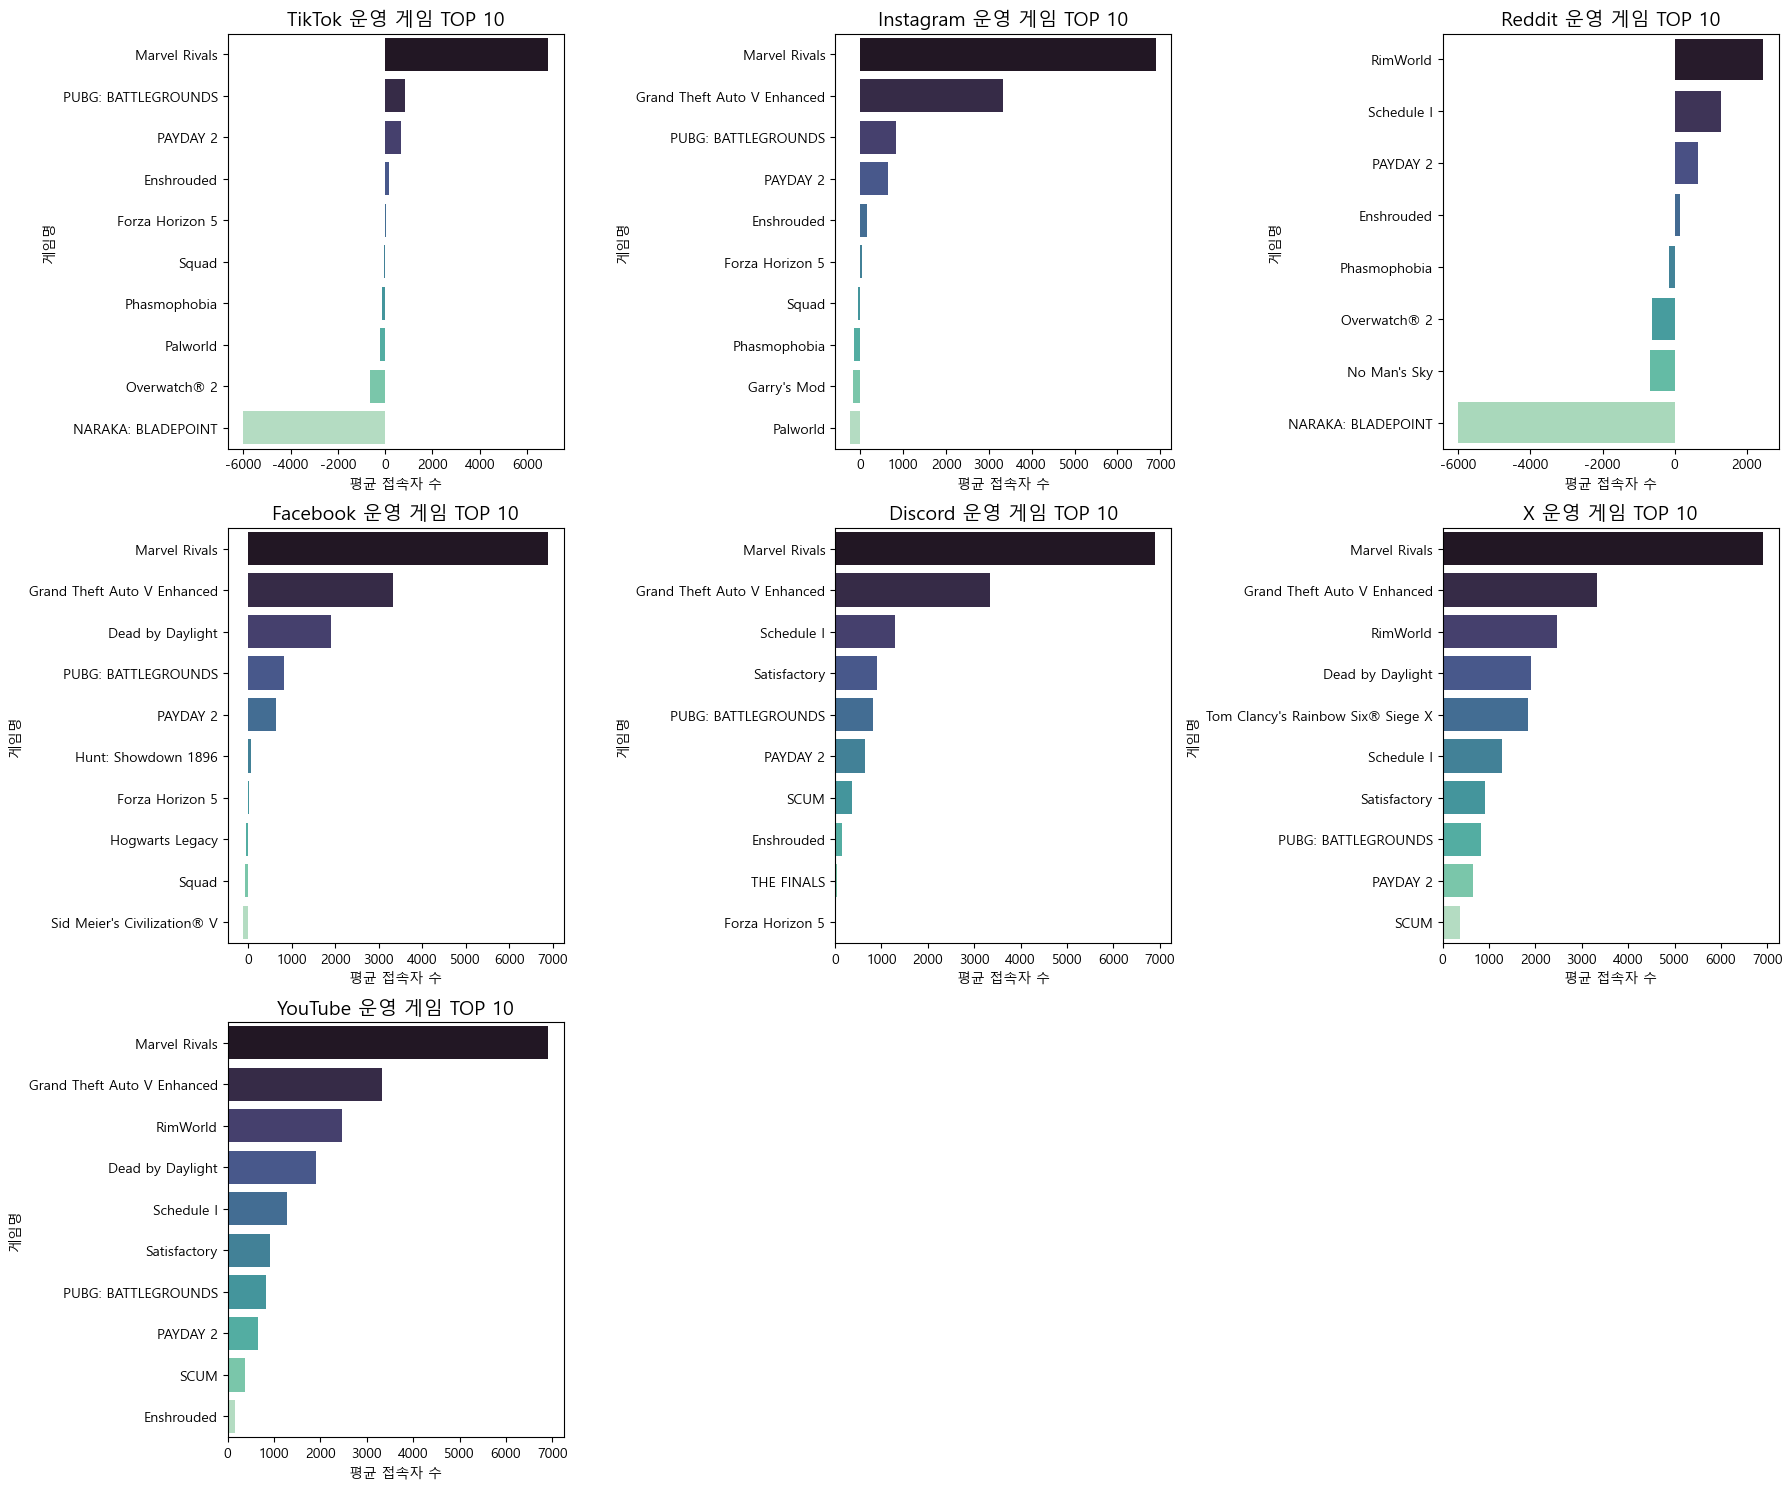

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1. SNS 채널 열 분리
sns_exploded = (
    df.assign(sns_channels=df_copy['sns_channels'].str.split(','))
      .explode('sns_channels')
)
sns_exploded['sns_channels'] = sns_exploded['sns_channels'].str.strip()

# 2. 분석할 채널 목록
target_channels = ["TikTok", "Instagram", "Reddit", 'Facebook', 'Discord', 'X', "YouTube"]

# 3. subplot 행렬 크기 계산 (한 줄에 3개)
n_channels = len(target_channels)
n_cols = 3
n_rows = math.ceil(n_channels / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # 2D 배열 → 1D 배열로 바꾸기

# 4. 채널별 그래프 생성
for i, channel in enumerate(target_channels):
    channel_data = (
        sns_exploded[
            (sns_exploded['sns_channels'] == channel) &
            (sns_exploded['avg_monthly_avg'] > 10000)  # 조건 추가
        ]
        .sort_values('avg_mean', ascending=False)
        .head(10)
    )
    
    sns.barplot(
        data=channel_data,
        x='avg_mean',
        y='game_name',
        ax=axes[i],
        palette='mako'
    )
    axes[i].set_title(f"{channel} 운영 게임 TOP 10", fontsize=14)
    axes[i].set_xlabel("평균 접속자 수")
    axes[i].set_ylabel("게임명")

# 5. 남는 subplot(빈칸) 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [36]:
for i in df[df['game_name'].str.contains('Overwatch')]['sns_channels'] :
    print(i)

Visit the website, YouTube, Instagram, Twitch, Reddit, TikTok, Threads, X, Facebook


- 틱톡 : 마블 라이벌즈, 배그, 페이데이 순
- 인스타 : 마블, 그타, 배그 순
- 레딧 : 림월드, 스케쥴1, 페이데이 순
- 페북 : 마블 라이벌즈, 그타, 데바데 순
- 디코 : 마블 라이벌즈, 그타, 스케쥴 순
- X : 마블 라이벌즈, 그타, 림월드 순
- 유튜브 : 마블 라이벌즈, 그타, 림월드 순

- SNS 채널을 많이 운영할 시 유저 수가 증가하는 경향을 보임
- 반대로 SNS 채널을 적게 운영할 수록 유저 수가 증감에 큰 영향이 없음
- 운영하는 SNS 채널이 6개부터 유저 수 증가 비율이 높아지는 경향이 있음

- 중국 SNS 채널을 운영할 수록 유저 수가 증가하는 경향이 굉장히 뚜렷하게 나타남

- 오버워치는 현재 9개의 채널을 운영 중임에도 불구하고 유저 수가 감소하는 경향을 띄고 있음
- 바로 위에서 언급된 게임들의 sns채널을 어떻게 운영하는지를 분석해 벤치마킹하는 것이 시급한 시점
- 그 중, 마블 라이벌즈는 중국 채널도 운영하며 다른 채널에서도 굉장히 준수한 성적을 내고 있어 벤치마킹이 필요한 사례(심지어 오버워치와 장르도 매우매우 유사함)

-> 중국 SNS 채널을 운영할지에 대한 결정이 필요한 시점(회사 내부 여건에 따라 달라짐)
-> 현재 오버워치가 운영하는 sns채널은 9개임에도 불구하고 유저 수가 감소하고 있음
-> 그렇기에, 현재 오버워치의 sns 채널 운영 방식에 문제가 있으며, 각 채널별 상위 유저 증가수를 보이는 게임들의 sns 채널을 분석해서 벤치마킹을 해야함(특히, 마블라이벌즈)

## DLC여부 접속자수

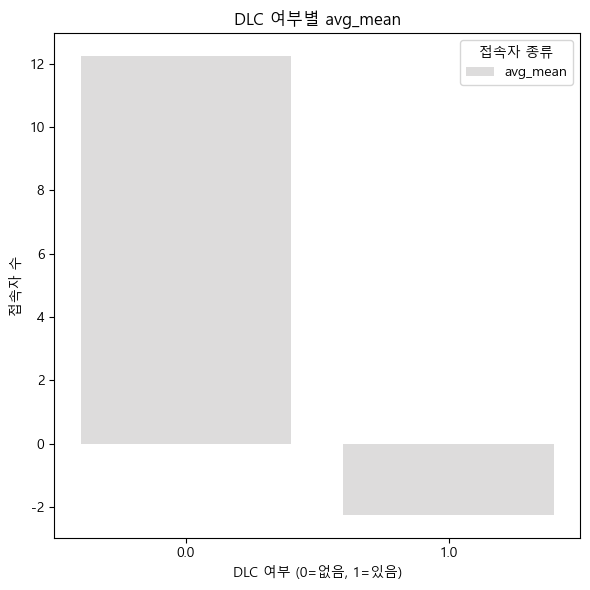

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ DLC여부별 평균 접속자 수 계산
dlc_avg = df.groupby('DLC여부')[['avg_mean']].mean().reset_index()

# 2️⃣ 시각화를 위해 melt
dlc_melted = dlc_avg.melt(
    id_vars='DLC여부',
    value_vars=['avg_mean'],
    var_name='접속자_종류',
    value_name='접속자수'
)

# 3️⃣ 시각화
plt.figure(figsize=(6,6))
sns.barplot(
    data=dlc_melted,
    x='DLC여부',
    y='접속자수',
    hue='접속자_종류',
    palette='coolwarm'
)
plt.xlabel('DLC 여부 (0=없음, 1=있음)')
plt.ylabel('접속자 수')
plt.title('DLC 여부별 avg_mean')
plt.legend(title='접속자 종류')
plt.tight_layout()
plt.show()

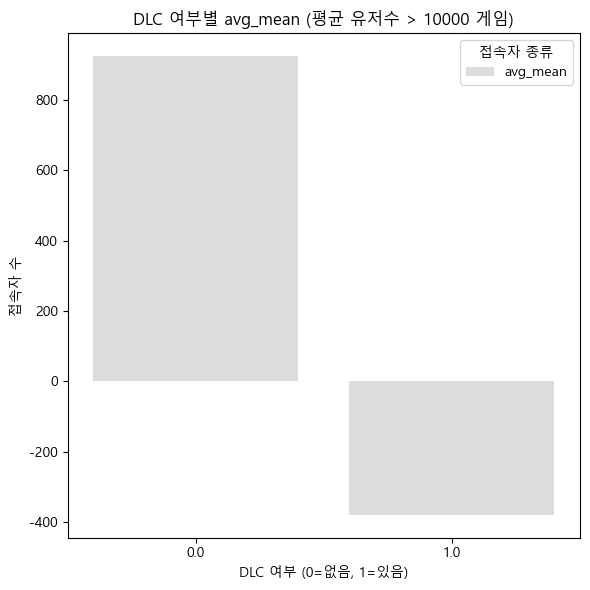

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ avg_monthly_avg > 10000 조건 필터링
df_filtered = df[df['avg_monthly_avg'] > 10000]

# 2️⃣ DLC여부별 평균 접속자 수 계산
dlc_avg = df_filtered.groupby('DLC여부')[['avg_mean']].mean().reset_index()

# 3️⃣ 시각화를 위해 melt
dlc_melted = dlc_avg.melt(
    id_vars='DLC여부',
    value_vars=['avg_mean'],
    var_name='접속자_종류',
    value_name='접속자수'
)

# 4️⃣ 시각화
plt.figure(figsize=(6,6))
sns.barplot(
    data=dlc_melted,
    x='DLC여부',
    y='접속자수',
    hue='접속자_종류',
    palette='coolwarm'
)
plt.xlabel('DLC 여부 (0=없음, 1=있음)')
plt.ylabel('접속자 수')
plt.title('DLC 여부별 avg_mean (평균 유저수 > 10000 게임)')
plt.legend(title='접속자 종류')
plt.tight_layout()
plt.show()


- DLC를 보유하지 않는 게임에서 유저 수가 증가하는 경향이 있음
- 이는, 전체 게임과 월 평균 유저수가 만 명 이상인 게임 모두 동일함
- 월 평균 유저수가 만 명 이상인 게임들은 오히려 DLC가 있을수록 유저 수가 감소 수치가 더 큼

- 오버워치는 DLC를 판매하기에 DLC를 판매하는 게임 중에서 유저 수가 감소하는 게임과 증가하는 게임의 차이 비교

In [39]:
# DLC 판매, 유저수 증가, 유저수 만명이상
df[(df['DLC여부'] == 1) & (df['avg_mean'] > 0) & (df['avg_monthly_avg'] > 10000)].sort_values('avg_mean', ascending=False).describe()

,appid,price,DLC여부,all_reviews,positive_reviews,negative_reviews,bundle,awards,discount,avg_monthly_avg,avg_mean,positive_ratio,sns_count
count,1.600000e+01,16.000000,16.0,1.600000e+01,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,9.799538e+05,30671.875000,1.0,3.488178e+05,2.907917e+05,58026.125000,0.875000,0.500000,21.562500,21033.751563,752.316146,0.795017,4.937500
std,8.302208e+05,26420.017466,0.0,3.788014e+05,3.174418e+05,66506.320128,0.341565,0.516398,31.666952,12219.761928,859.765103,0.137656,3.275541
min,2.186200e+05,0.000000,1.0,3.819900e+04,2.220200e+04,4542.000000,0.000000,0.000000,0.000000,10066.112500,24.958333,0.546923,1.000000
25%,3.757950e+05,8250.000000,1.0,1.079852e+05,8.208100e+04,14757.000000,1.000000,0.000000,0.000000,14305.667708,67.589583,0.731049,2.750000
50%,5.607600e+05,26250.000000,1.0,2.267350e+05,1.966325e+05,33500.500000,1.000000,0.500000,0.000000,18084.316667,341.883333,0.811611,4.500000
75%,1.290555e+06,51725.000000,1.0,3.564582e+05,3.238952e+05,68902.000000,1.000000,1.000000,50.000000,21885.808333,1187.997917,0.889016,6.500000
max,2.878980e+06,83000.000000,1.0,1.433025e+06,1.192093e+06,240932.000000,1.000000,1.000000,86.000000,58800.862500,2465.725000,0.979165,11.000000


In [40]:
# DLC 판매, 유저수 감소, 유저수 만명이상
df[(df['DLC여부'] == 1) & (df['avg_mean'] < 0) & (df['avg_monthly_avg'] > 10000)].sort_values('avg_mean', ascending=False).describe()

,appid,price,DLC여부,all_reviews,positive_reviews,negative_reviews,bundle,awards,discount,avg_monthly_avg,avg_mean,positive_ratio,sns_count
count,2.400000e+01,24.000000,24.0,2.400000e+01,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,7.702688e+05,22075.833333,1.0,4.798626e+05,3.993649e+05,80497.708333,0.875000,0.458333,27.958333,48216.094618,-1132.849306,0.839323,5.666667
std,6.331485e+05,25306.522946,0.0,5.032162e+05,4.199083e+05,110263.247525,0.337832,0.508977,38.836871,88068.191278,1541.407883,0.156998,2.648489
min,4.400000e+02,0.000000,1.0,4.707200e+04,4.627400e+04,798.000000,0.000000,0.000000,0.000000,10014.979167,-6013.191667,0.244386,1.000000
25%,2.697800e+05,0.000000,1.0,2.446730e+05,1.798775e+05,23035.750000,1.000000,0.000000,0.000000,11421.891667,-1291.820833,0.807822,4.000000
50%,7.374900e+05,8650.000000,1.0,3.536905e+05,3.075580e+05,34221.000000,1.000000,0.000000,0.000000,15914.802083,-613.350000,0.877133,5.000000
75%,1.116010e+06,39125.000000,1.0,4.997760e+05,4.478920e+05,81030.000000,1.000000,1.000000,52.500000,46336.064583,-204.975000,0.941389,7.250000
max,2.357570e+06,79800.000000,1.0,2.532657e+06,2.062547e+06,470110.000000,1.000000,1.000000,100.000000,438166.600000,-2.091667,0.983047,10.000000


- 해당 게임들의 수치적인 차이에서 큰 차이는 없음
- 오히려 유저 수가 감소하는 그룹에서 월 평균 유저수, 리뷰 수, 긍정 리뷰 비율, 운영 sns채널 수의 평균이 더 높게 나옴

- dlc를 판매하고 있는 게임들이 어떤 dlc를 판매하는지 파악

In [41]:
df[(df['DLC여부'] == 1) & (df['avg_monthly_avg'] > 10000) & (df['avg_mean'] > 300)].sort_values('avg_mean', ascending=False)['game_name'].head(20)

3138                             RimWorld
3081                             NBA 2K25
3045                     Dead by Daylight
3247    Tom Clancy's Rainbow Six® Siege X
26                 ARK: Survival Ascended
16                           Satisfactory
274                              PAYDAY 2
172                                  SCUM
3345                             Factorio
Name: game_name, dtype: object

- 림월드 : 확장팩
- 데바데 : 인 게임 아이템
- 레식 : 인 게임 아이템
- 아크 : 확장팩, 스킨
- 새티스팩토리 : 사운드트랙
- 페이데이2 : 확장팩, 사운드트랙, 인게임 아이템
- 스컴 : 인 게임 아이템
- 팩토리오 : 사운드트랙

- 오버워치 : 확장팩, 인 게임 아이템

- DLC를 판매하지 않는 게임들이 오히려 유저 수 증가량이 높은 경향이 있음
- 유저 수가 만 명 이상인 게임들은 DLC를 판매할 수록 유저 수 감소 경향이 더 높게 나타남

- DLC를 판매하는 게임중 유저수가 증가하는 경향의 게임과 오버워치의 DLC 목록을 비교했을 때 
- 큰 차이가 존재하지는 않음
- 다만, 차이라고 한다면 위 언급된 게임들은 유료 게임이고 오버워치는 무료 게임이라는 것
- 오버워치는 DLC를 유료로 판매하고 있음

-> DLC 자체가 월 평균 유저수 증가에 큰 영향을 끼치지 않는다고 판단됨
-> 다만, DLC 자체가 사람들의 관심을 끌기에는 충분한 요소(단변량 EDA 결과)
-> 그렇기에 오버워치의 DLC 구조를 바꿔본다면 어느정도 가능성이 있다고 판단됨
-> DLC를 무료로 풀거나 차별화된 DLC로 배경화면, 아트북 등을 판매하는 것도 좋은 방법이라고 생각됨

## 번들 판매 여부와 접속자 수

In [42]:
df['bundle'].value_counts()

bundle
1.0    2351
0.0    1000
Name: count, dtype: int64

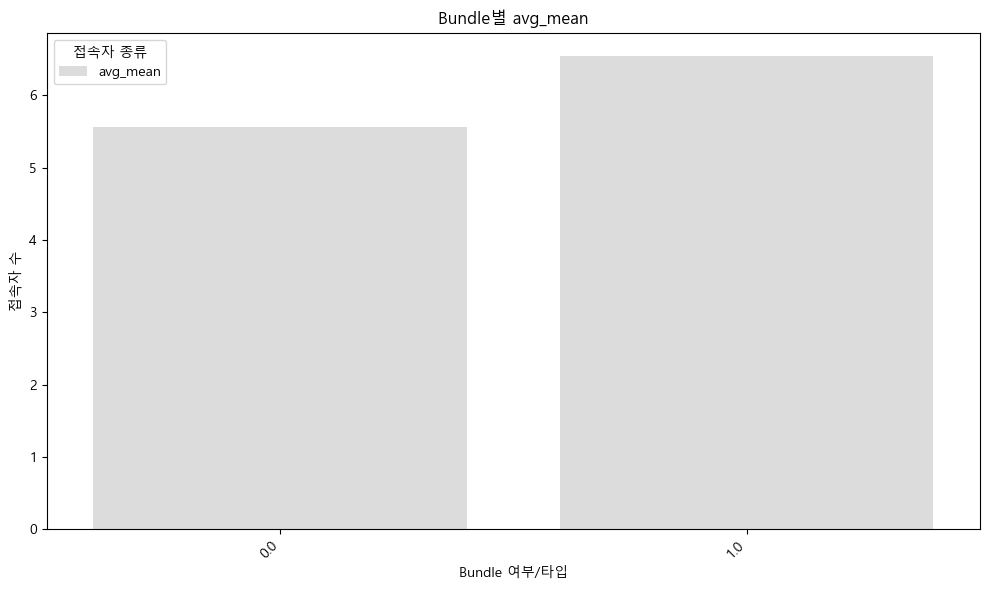

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ bundle별 평균 접속자 수 계산
bundle_avg = df.groupby('bundle')[['avg_mean']].mean().reset_index()

# 2️⃣ 시각화를 위해 melt
bundle_melted = bundle_avg.melt(
    id_vars='bundle',
    value_vars=['avg_mean'],
    var_name='접속자_종류',
    value_name='접속자수'
)

# 3️⃣ 시각화
plt.figure(figsize=(10,6))
sns.barplot(
    data=bundle_melted,
    x='bundle',
    y='접속자수',
    hue='접속자_종류',
    palette='coolwarm'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bundle 여부/타입')
plt.ylabel('접속자 수')
plt.title('Bundle별 avg_mean')
plt.legend(title='접속자 종류')
plt.tight_layout()
plt.show()

- 번들로 판매하지 않았을 때보다 판매했을 때 월 평균 유저 수 증가 수치가 조금 더 높음
- 위에서 번드롤 판매할 시 사람들의 긍정 리뷰 비율이 더 높은 경향이 있어 이를 마케팅에 활용해야함

## 할인률

C:\Users\user\AppData\Local\Temp\ipykernel_28488\1162770710.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_avg = df.groupby('discount_bin')[['avg_mean']].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_28488\1162770710.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_avg, x='discount_bin', y='avg_mean', palette='magma')


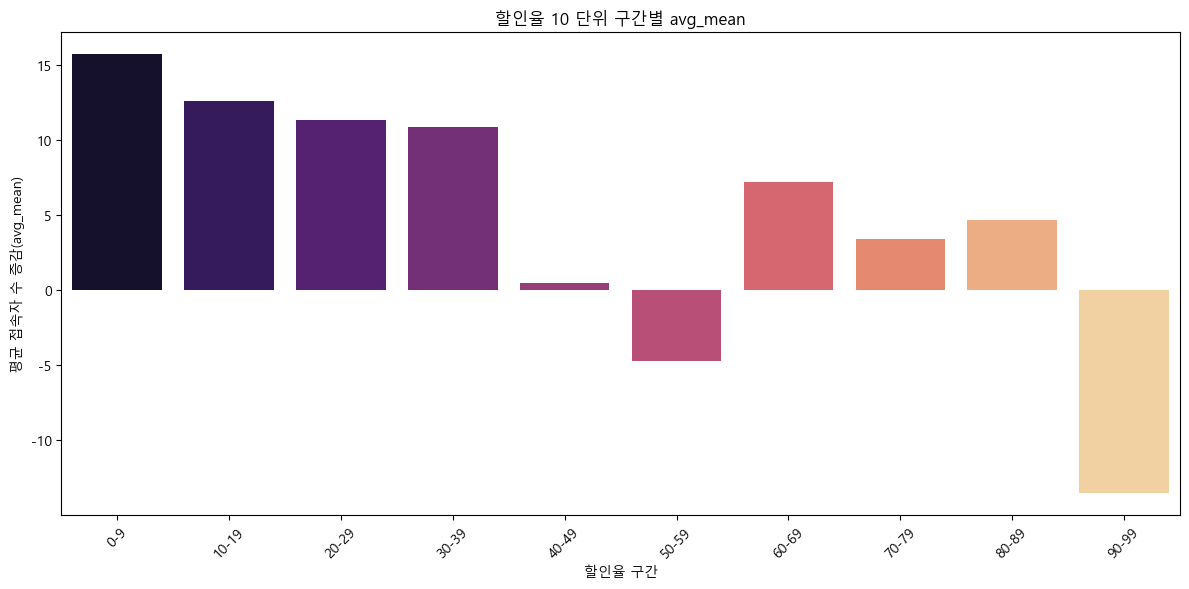

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ discount를 10 단위 구간으로 나누기
bins = range(0, 110, 10)  # 0,10,20,...,100
labels = [f"{b}-{b+9}" for b in bins[:-1]]
df['discount_bin'] = pd.cut(df['discount'], bins=bins, labels=labels, right=False)

# 2️⃣ 구간별 avg_mean 평균 계산
discount_avg = df.groupby('discount_bin')[['avg_mean']].mean().reset_index()

# 3️⃣ 시각화
plt.figure(figsize=(12,6))
sns.barplot(data=discount_avg, x='discount_bin', y='avg_mean', palette='magma')
plt.xticks(rotation=45)
plt.xlabel("할인율 구간")
plt.ylabel("평균 접속자 수 증감(avg_mean)")
plt.title("할인율 10 단위 구간별 avg_mean")
plt.tight_layout()
plt.show()


- 할인률이 높을 수록 유저 수 증가하는 폭이 더 적은 경향이 있고 
- 오히려 50, 90%대의 할인 수치는 유저 수가 감소하는 경향을 보여줌
- 40% 밑의 할인률이 유저 수 증가수치가 더 높아 이를 마케팅에 활용해야 함

- 가격과 번들(0.48), 가격과 DLC여부(0.28), DLC여부와 번들 및어워드(0.22) 로
- 가격이 높을 수록 번들을 판매하는 경향이 있고 DLC를 판매하는데에도 어느정도 관계가 있음
- DLC 여부가 번들 판매와 수상 여부에도 어느 정도 관계가 있음
- 전체, 긍정, 부정 리뷰 수가 월 평균 유저 수와 매우 강한 관계가 있음
- 할인률과 번들판매간의 어느정도 관계가 있는 편

- 월 평균 유저수 증감에는 다른 열들과 별로 관계가 없는 편
- 긍정 리뷰 비율은 번들 여부와 어느정도 약한 관계가 있는편

-> 번들로 판매할 시 사람들의 긍정적인 리뷰를 유도할 수 있으며 이는 마케팅 요소로 활용 가능

# 결론
- 무료 플레이, 액션 장르는 전체적으로 유저 수가 감소하는 추세지만 헬 다이버즈, 배그, 델타포스는 유저 수가 증가하는 추세
- **배그, 델타포스, 마블라이벌즈, 림월드, 레식, 사펑, 데바데**는 각 장르 중에서 유저 수 증가가 높은 케이스

- 리뷰 수, 월 평균 유저 수, 긍정 리뷰 비율 모두 적은 게임이 유저 수 증가수치가 높은 경향이 있음
- 리뷰 수, 긍정 리뷰 비율이 유저 수 증감에 큰 영향을 끼치지 않고 오히려 부정 리뷰 비율이 높을 수록 유저 수가 증가하는 경향이 있음

- 가격과 번들, 가격과 DLC여부, DLC와 번들은 어느정도 관계가 있는 편으로
- 가격이 높을 수록 번들을 판매하는 경향이 있고 DLC를 판매하는 데에도 어느정도 영향이 있음
- 할인률과 번들판매 여부간의 관계가 어느정도 있는 편
- 긍정 리뷰 비율은 번들 여부와 약한 관계가 있음
- 반면, 월 평균 유저 수 증감에는 크게 영향을 끼치는 변수가 없음

- 가격이 높아질수록 월 평균 유저 수 감소폭이 크며 낮은 가격일 수록 유저들이 게임을 꾸준히 플레이하는 경향이 높음
- 가격이 높아질수록 월 평균 유저 수 감소폭이 큼
- 낮은 가격일수록 게임을 꾸준히 플레이 하는 경향이 높다고 판단됨

- SNS 채널을 적게 운영 할 수록 유저 수가 증가 수치가 미미한 편
- 운영하는 SNS 채널이 6개 이상부터 유저 수 증가비율이 높아지는 경향이 있음
- 중국 SNS 채널을 운영하는 게임에서 유저 수 증가 수치가 굉장히 뚜렷하게 나타남
- 마블 라이벌즈는 중국 채널도 운영하고 다른 채널을 운영하며 높은 유저 수 증가수치를 보여줌

- DLC를 판매하지 않는 게임에서 유저 수 증가수치가 높은 경향이 있음
- DLC를 판매하는 게임 중 유저 수가 증가하는 경향의 게임과 오버워치의 DLC를 비교 했을때
- 오버워치는 무료이고(DLC는 유료 판매중) 다른 게임은 유료 게임이란 것

- 번들로 판매하지 않았을 때보다 판매했을 때 월 평균 유저 수 증가 수치가 조금 더 높음

- 할인률이 높을 수록 유저 수 증가하는 폭이 더 적은 경향이 있고 
- 오히려 50, 90%대의 할인 수치는 유저 수가 감소하는 경향을 보여줌
- 40% 이하의 할인률에서는 높은 유저 수 증가수치를 보여줌


-> 현재 오버워치는 DLC, 운영하는 SNS 채널에 문제가 있으며 이를 해결해야함
-> 그 방법으로 위에 언급된 게임들의 SNS채널을 분석해서 벤치마킹이 좋은 방법이라고 판단되며(특히, 마블라이벌즈)
-> DLC 판매 목록을 변경해서 확장팩을 무료로 배포하거나 바탕화면, 아트북 등 다른 굿즈를 판매하는 것도 좋은 방법
-> 신규 유저를 대상으로 번들(DLC포함 등)을 40% 이하의 할인된 가격으로 판매할 시 어느정도의 긍정적인 리뷰를 획득할 수 있을 가능성이 높음
-> 다만, 현재 가지고 있는 데이터만으로는 월 평균 유저 수 증감 원인을 명확하게 밝히긴 어려워 우수 게임을 선정해 마케팅, 업데이트 데이터를 추가 수집해 분석을 해야함

# 우수 게임 선정 기준
- 유사 장르, 번들 여부, SNS 채널 11 or 12개 운영, 같은 군집(클러스터링 진행)

- 마블 라이벌즈 : EDA 결과 높은 유저 수 증가수치와 SNS채널 성과로 필수로 분석해야함
- 유사 장르 : 오버워치와 스팀 내에서 유사한 장르(무료 플레이) + 유저들이 느끼는 오버워치와 유사한 장르(하이퍼FPS)
- 번들 여부 : 번들이 긍정 리뷰에 영향을 끼치는 편이며 번들로 판매했을 때 유저 수 증가 수치가 더 높은 경향
- SNS 채널 : 11개나 12개를 운영하는 게임이 유저 수가 높은 경향이 굉장히 뚜렷하게 나타남, 해당 게임들의 채널 운영방식을 분석해 오버워치에 적용해야함

In [47]:
df.drop(['avg_sign', 'discount_bin'], axis=1, inplace=True)
df.to_csv('최종_스팀게임정보12차.csv')